In [ ]:
import numpy as np
import pandas as pd
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_palette('colorblind')
sns.set_theme()

np.random.seed(42)

## Reading absorbers

`spectra_TNG50-1_z{redshift}_n{N}d{d}_fullbox_{instrument}_{ion}`

In [3]:
abs_path = './../spectra_Roland/absorbers/MgII/'

In [4]:
absorbers_z_05 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z0.5_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_05.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [5]:
absorbers_z_07 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z0.7_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_07.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [6]:
absorbers_z_1 = h5py.File(abs_path + 'MgII_full/spectra_TNG50-1_z1.0_2_4MOST_HRS_MgII_2796-MgII_2803.hdf5', 'r')
absorbers_z_1.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [7]:
for absor in [absorbers_z_05['EW_MgII_2796'], absorbers_z_07['EW_MgII_2796'], absorbers_z_1['EW_MgII_2796']]:
    print('Length =', absor.shape)
    print('Minimum =', np.min(absor))
    print('Mean =', np.mean(absor))
    print('Median =', np.median(absor))
    print('Maximum', np.max(absor), '\n')

Length = (55077,)
Minimum = 0.0006630511
Mean = 0.2628653
Median = 0.031023469
Maximum 8.561692 

Length = (64672,)
Minimum = 0.00066512794
Mean = 0.29549444
Median = 0.03319695
Maximum 11.172448 

Length = (78124,)
Minimum = 0.0006652446
Mean = 0.34022468
Median = 0.03391719
Maximum 29.98556 



In [8]:
EW_MgII2796_z_05 = h5py.File(abs_path + 'MgII_EW2796_rest_005/MgII_abs_EW2796_rest_005_0.5.hdf5', 'r')
EW_MgII2796_z_05.keys()

<KeysViewHDF5 ['EW_MgII_2796', 'EW_MgII_2803', 'EW_total', 'flux', 'master_wave', 'ray_pos']>

In [9]:
print('Length =', EW_MgII2796_z_05['EW_MgII_2796'].shape)
print('Minimum =', np.min(EW_MgII2796_z_05['EW_MgII_2796']))
print('Mean =', np.mean(EW_MgII2796_z_05['EW_MgII_2796']))
print('Median =', np.median(EW_MgII2796_z_05['EW_MgII_2796']))
print('Maximum', np.max(EW_MgII2796_z_05['EW_MgII_2796']), '\n')

Length = (22649,)
Minimum = 0.05000657836596171
Mean = 0.41340750340764715
Median = 0.2797364592552185
Maximum 5.707794825236003 



---

## Reading train-test samples

$ \text{EW}^{rest}_{2796} \geq 0.05 \implies $ WITH absorber

$ \text{EW}^{rest}_{2796} < 0.05 \implies $ no absorber

In [11]:
test = h5py.File('./../spectra_Roland/samples/test_samples/real_samples/SNRfull_WLfull_WL_fixed_range_fixed_test_ygap.hdf5', 'r')
test.keys()

<KeysViewHDF5 ['EW_r_2796', 'EW_r_2803', 'EW_r_total', 'SNR', 'absorber_true', 'cent_WL_2796', 'cent_pix_2796', 'flux', 'master_wave', 'redshift']>

In [12]:
train = h5py.File('./../spectra_Roland/samples/training_samples/real_samples/WL_fixed/SNRfull_WLfull_range_fixed_ygap.hdf5', 'r')
train.keys()

<KeysViewHDF5 ['EW_r_2796', 'EW_r_2803', 'EW_r_total', 'SNR', 'absorber_true', 'cent_WL_2796', 'cent_pix_2796', 'flux', 'master_wave', 'redshift']>

In [15]:
for set__ in [train['EW_r_2796'], train['EW_r_2796'][train['EW_r_2796'][:]>=0.05], test['EW_r_2796'], test['EW_r_2796'][test['EW_r_2796'][:]>=0.05]]:
    print('Length =', set__.shape)
    print('Minimum =', np.min(set__))
    print('Mean =', np.mean(set__))
    print('Median =', np.median(set__))
    print('Maximum', np.max(set__), '\n')

Length = (685237,)
Minimum = 0.0
Mean = 2.063230799118556
Median = 1.9293942170984606
Maximum 5.128101348876953 

Length = (548184,)
Minimum = 0.05005777254700661
Mean = 2.57906484518994
Median = 2.567206541697184
Maximum 5.128101348876953 

Length = (731031,)
Minimum = 0.0
Mean = 1.289981783514945
Median = 0.0
Maximum 5.128101348876953 

Length = (365512,)
Minimum = 0.05000977714856466
Mean = 2.579988271752265
Median = 2.5672359466552734
Maximum 5.128101348876953 



In [21]:
train_with_abs_perc = 100 * train['EW_r_2796'][train['EW_r_2796'][:]>=0.05].shape[0] / (train['EW_r_2796'].shape[0])
print(f'Perc of spec with absorbers in training set = {train_with_abs_perc:.3f}')
print(f'Perc of spec without absorbers in training set = {100 - train_with_abs_perc:.3f} \n')

test_with_abs_perc = 100 * test['EW_r_2796'][test['EW_r_2796'][:]>=0.05].shape[0] / (test['EW_r_2796'].shape[0])
print(f'Perc of spec with absorbers in test set = {test_with_abs_perc:.3f}')
print(f'Perc of spec without absorbers in test set = {100 - test_with_abs_perc:.3f} \n')

Perc of spec with absorbers in training set = 79.999
Perc of spec without absorbers in training set = 20.001 

Perc of spec with absorbers in test set = 50.000
Perc of spec without absorbers in test set = 50.000 



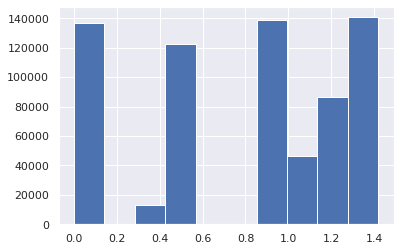

In [50]:
plt.hist(train['redshift']);

In [ ]:
# to-do: check label based on EW


## Plot a few training spec

In [63]:
train.keys()

<KeysViewHDF5 ['EW_r_2796', 'EW_r_2803', 'EW_r_total', 'SNR', 'absorber_true', 'cent_WL_2796', 'cent_pix_2796', 'flux', 'master_wave', 'redshift']>

In [68]:
train['master_wave'][train['master_wave'][:]>6000].shape  # red arm

(2475,)

In [69]:
train['master_wave'].shape[0], train['flux'].shape[1]
# what is the wavelength grid? MgII abs inserted in which window?

(10958, 6316)

ValueError: x and y must have same first dimension, but have shapes (10958,) and (6316,)

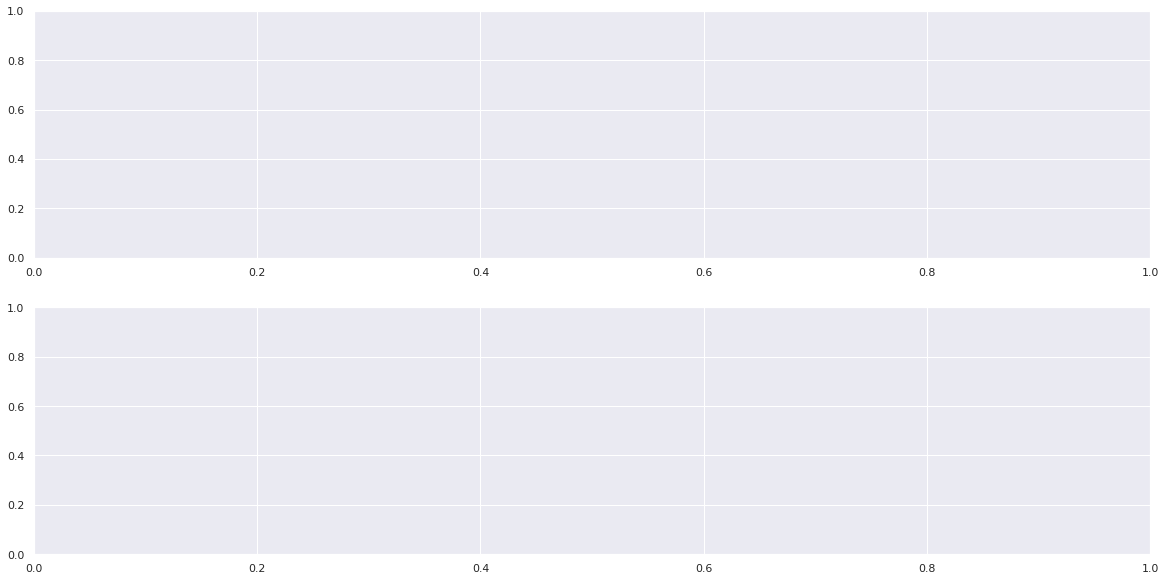

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(20, 10))

random_with_idx = np.random.choice(np.where(train['EW_r_2796'][:] >= 0.05)[0])
random_with_abs = train['flux'][random_with_idx, :]
ax1.plot(train['master_wave'], random_with_abs, label='With MgII absorber, z=' + str(train['redshift'][random_with_idx]))

random_without_idx = np.random.choice(np.where(train['EW_r_2796'][:] > 0.05)[0])
random_without_abs = train['flux'][random_without_idx, :]
ax2.plot(train['master_wave'], random_without_abs, label='No absorber, z=' + str(train['redshift'][random_without_idx]))

plt.xlabel('Wavelength [ang]')
ax1.set_ylabel('Flux')
ax2.set_ylabel('Flux')

# plt.savefig('./../spectra_Roland/plotted_spectra/example_specs_with_without_abs.png', dpi=400)

plt.show()